![image](../QSS/Qulabs.png)

# Lab 2: Single-qubit and multi-qubit gates, quantum circuits

In this lab, you will learn how to create `QuantumCircuit` in qiskit and add single-qubit and multi-qubit gates, how to execute/ run the circuit etc.

### Import necessary packages

At the begining, you will need to import some packgees into your notebook.

In [18]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, transpile, IBMQ
from qiskit.visualization import plot_histogram
from qiskit.tools import job_monitor

Load IBMQ provider and backends

In [24]:
# Load IBM account
if not IBMQ.active_account():
    IBMQ.load_account()

# Get a specific backend, for example, 'ibmq_athens'
#backend = provider.get_backend('ibmq_athens')
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
# Select backend/ simulator
#backend = provider.get_backend('ibm_oslo')
#print(backend)
backend = provider.get_backend('ibmq_qasm_simulator')


# Single-qubit Quantum Circuit

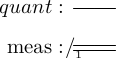

In [25]:
q_r = QuantumRegister(1, name = 'quant')
c_r = ClassicalRegister(1, name = 'meas')
mycircuit = QuantumCircuit(q_r, c_r)
mycircuit.draw('latex')

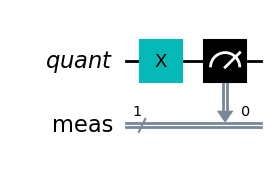

In [26]:
mycircuit.x(0)
mycircuit.measure(0, 0)
mycircuit.draw('mpl')

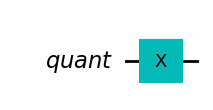

In [27]:
mycircuit.remove_final_measurements()
mycircuit.draw('mpl')

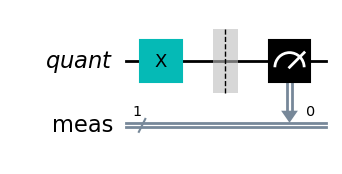

In [28]:
mycircuit.measure_all()
mycircuit.draw('mpl')

You can execute a circuit in different ways:

In [29]:
job = sim.run(mycircuit, shots = 1024)

# monitor job
job_monitor(job)

Job Status: job has successfully run


In [30]:
# Collect job results
result = job.result()
count = result.get_counts()
print(count)

{'1': 1024}


You can see histogram also

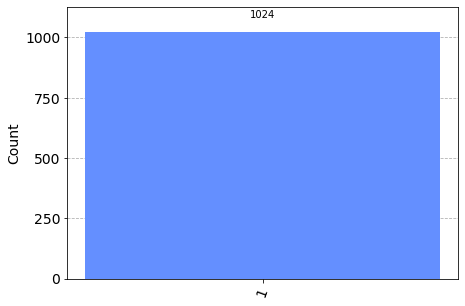

In [9]:
plot_histogram(count)

Run circuit in real backend

In [10]:
job_id = backend.run(mycircuit, shots = 1024).job_id()

job_id

'63866a8a8b25fe4d8aca6ec3'

In [11]:
# Collect job results
job = backend.retrieve_job(job_id)
result = job.result()
count = result.get_counts()
print(count)

{'0': 13, '1': 1011}


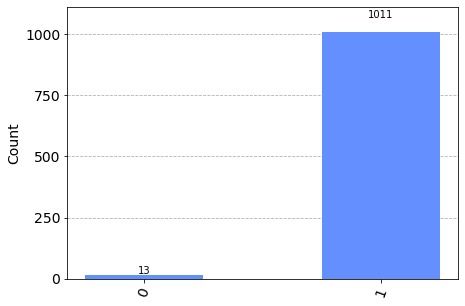

In [12]:
plot_histogram(count)

You can execute a circuit using execute function also

In [13]:
job = execute(mycircuit, backend = sim, shots = 1024)

# monitor job
job_monitor(job)

Job Status: job has successfully run


In [14]:
# Collect job results
result = job.result()
count = result.get_counts()
print(count)

{'1': 1024}


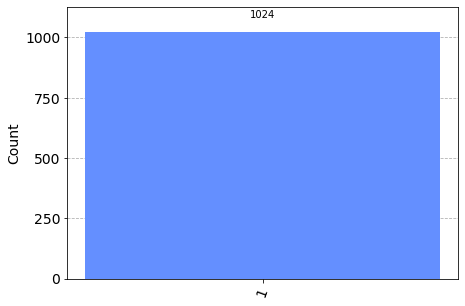

In [15]:
plot_histogram(count)

Now let us create another circuit

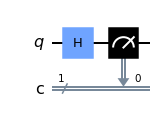

In [16]:
mycircuit1 = QuantumCircuit(1, 1)

mycircuit1.h(0)
mycircuit1.measure(0, 0)
mycircuit1.draw('mpl')

In [23]:
job = backend.run(mycircuit1, shots = 1024)

# monitor job
job_monitor(job)

Traceback (most recent call last):
  Cell In[23], line 1
    job = backend.run(mycircuit1, shots = 1024)
NameError: name 'backend' is not defined

Use %tb to get the full traceback.


In [22]:
# Collect job results
result = job.result()
count = result.get_counts()
print(count)

Traceback (most recent call last):
  Cell In[22], line 2
    result = job.result()
NameError: name 'job' is not defined

Use %tb to get the full traceback.


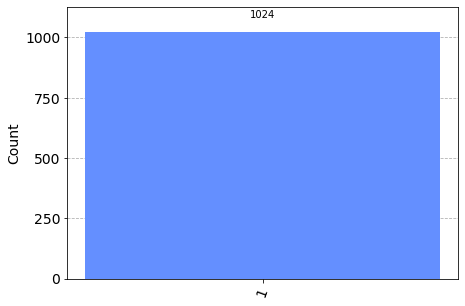

In [19]:
plot_histogram(count)

I want to run the circuit in real backend. Hadamard gate is not there in real backend, so I need to transpile the circuit first

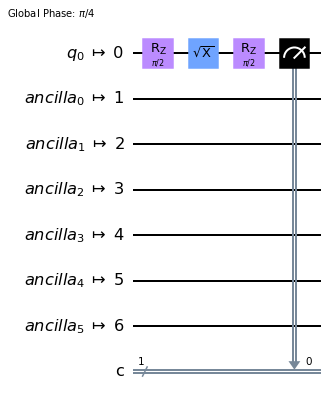

In [20]:
trans = transpile(mycircuit1, backend)
trans.draw('mpl')

In [21]:
job0 = backend.run(trans, shots = 1024).job_id()

# monitor job
# job_monitor(job)

In [22]:
# Collect job results
result = job.result()
count = result.get_counts()
print(count)

Traceback (most recent call last):
  Input In [22] in <cell line: 2>
    result = job.result()
  File /opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/job/ibmqjob.py:290 in result
    raise IBMQJobFailureError(
IBMQJobFailureError: "Unable to retrieve result for job 63866aaf8c2a5abecd16b899. Job has failed: The Qobj uses gates (['h']) that are not among the basis gates (['id', 'rz', 'sx', 'x', 'cx', 'reset']). Error code: 1106."

Use %tb to get the full traceback.


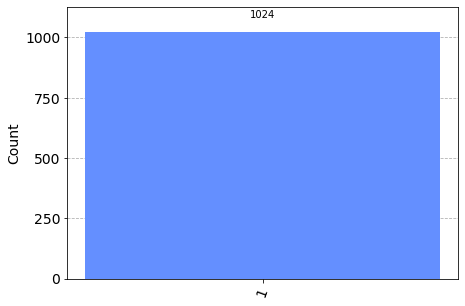

In [23]:
plot_histogram(count)

But inspite of using `run()` if you use `execute()` then you don't need to transpile before submitting. `execute()` will do the work for you

In [24]:
job = execute(mycircuit1, backend, shots = 1024)

# monitor job
job_monitor(job)

Job Status: job has successfully run


In [25]:
# Collect job results
result = job.result()
count = result.get_counts()
print(count)

{'0': 503, '1': 521}


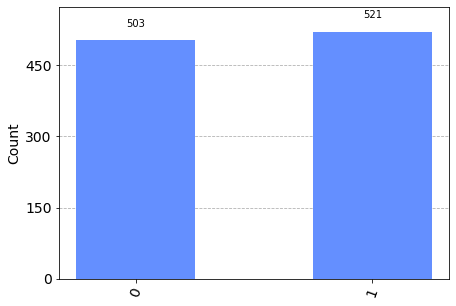

In [26]:
plot_histogram(count)

Let's see one more circuit

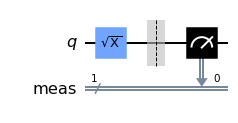

In [27]:
mycircuit2 = QuantumCircuit(1)

mycircuit2.sx(0)
mycircuit2.measure_all()
mycircuit2.draw('mpl')

In [28]:
job = execute(mycircuit2, sim, shots = 1024)

# monitor job
job_monitor(job)

Job Status: job has successfully run


In [29]:
# Collect job results
result = job.result()
count = result.get_counts()
print(count)

{'0': 481, '1': 543}


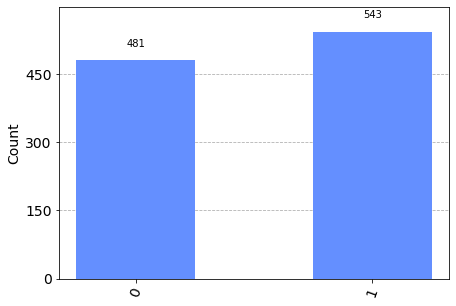

In [30]:
plot_histogram(count)

# Assignment

#### Read the instructions carefully. You are NOT ALLOWED to make any change outside the instructed place.
#### Naming format for the submitted file should be Lab2_\<Your_Name\>.ipynb. If you use any other format that submission will not be considered!!!

# Lab - 2 Assignment - 1 [1 Point]

Plot `bloch sphere` for mycircuit2 above.

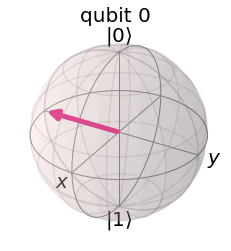

In [31]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
mycircuit2.remove_final_measurements()
state = Statevector(mycircuit2)
plot_bloch_multivector(state)

# Lab - 2 Assignment - 2 [1 Point]

Complete following circuit:

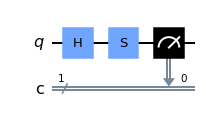

In [32]:
qc = QuantumCircuit(1, 1)

## Add your code here to create the state |+⟩ - START
qc.h(0)

## |+⟩ is created - END
qc.s(0)
qc.measure(0, 0)
qc.draw('mpl')

# Lab - 2 Assignment - 3 [2 Points]

Write code to transpile the circuit `qc` from Assignment 2 for `real backend`, run it using `run()`, collect result, plot histogram. Find out final statevector [***NOTE:*** To find statevector you have to modify the circuit as required and run it on state vector simulator like `QasmSimulator`].

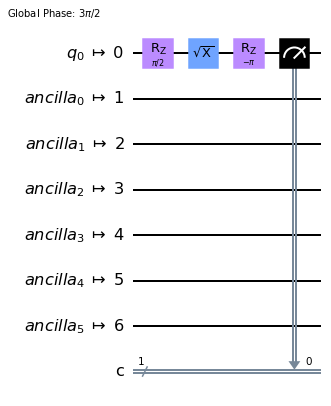

In [43]:
trans1 = transpile(qc, backend)
trans1.draw('mpl')

In [47]:
job = backend.run(trans1, shots = 1024).job_id()
job_monitor(job)

Traceback (most recent call last):
  Input In [47] in <cell line: 1>
    job = backend.run(trans1, shots = 1024).job_id()
  File /opt/conda/lib/python3.8/site-packages/qiskit/utils/deprecation.py:28 in wrapper
    return func(*args, **kwargs)
  File /opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqbackend.py:330 in run
    return self._submit_job(qobj, job_name, job_tags, experiment_id, live_data_enabled)
  File /opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqbackend.py:391 in _submit_job
    raise IBMQBackendApiError('Error submitting job: {}'.format(str(ex))) from ex
IBMQBackendApiError: 'Error submitting job: \'403 Client Error: Forbidden for url: https://s3.us-east.cloud-object-storage.appdomain.cloud/us-east-quantum-computing-user-jobs-prod/qObject-638670ced5b1bc88ced8c261.json?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=21ce861c64cc417e9a95f95263ecf8f7%2F20221129%2Fus-east%2Fs3%2Faws4_request&X-Amz-Date=20221129T205126Z&X-Amz-Expires=604800&

In [50]:
# Collect job results
result = job.result()
count = result.get_counts()
print(count)

{'0': 481, '1': 543}


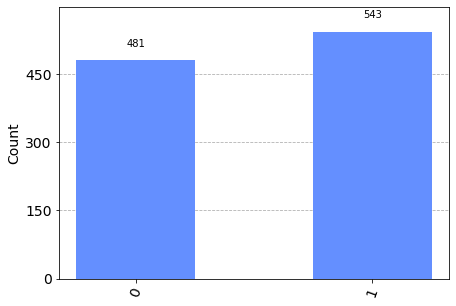

In [51]:
plot_histogram(count)

In [54]:
from qiskit import Aer
qc.remove_final_measurements()

In [55]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend=backend, shots=1, memory=True)
job_result = job.result()
print(job_result.get_statevector(qc))

Statevector([7.07106781e-01+0.j        , 4.32978028e-17+0.70710678j],
            dims=(2,))


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Multi-Qubit Circuits

Let us now create a two qubit circuit representing Bell state $\vert\Phi^+\rangle$

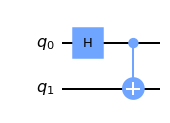

In [3]:
mycircuit3 = QuantumCircuit(2)

mycircuit3.h(0)
mycircuit3.cx(0, 1)
mycircuit3.draw('mpl')

In [4]:
from qiskit import Aer
from qiskit.visualization import array_to_latex

backend0 = Aer.get_backend('qasm_simulator')

mycircuit3.save_statevector()

result = backend0.run(mycircuit3).result()
sv3 = result.get_statevector()

array_to_latex(sv3)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<IPython.core.display.Latex object>

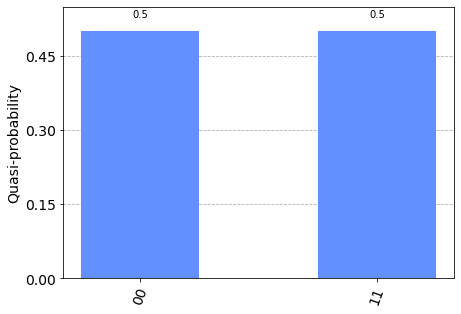

In [5]:
count = result.get_counts()
plot_histogram(count)

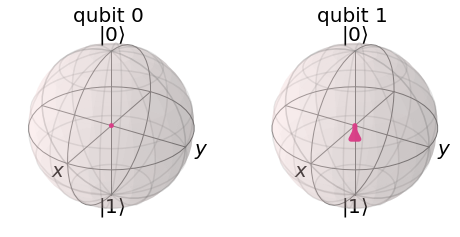

In [6]:
from qiskit.visualization import plot_bloch_multivector
import math

plot_bloch_multivector(sv3)

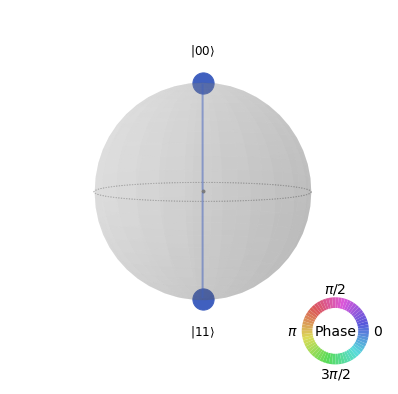

In [7]:
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(sv3)

Now let us apply some phase

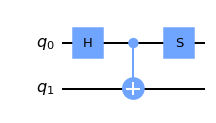

In [8]:
mycircuit4 = QuantumCircuit(2)

mycircuit4.h(0)
mycircuit4.cx(0, 1)

mycircuit4.s(0)

mycircuit4.draw('mpl')

In [9]:
mycircuit4.save_statevector()

result = backend0.run(mycircuit4).result()
sv4 = result.get_statevector()

array_to_latex(sv4)

<IPython.core.display.Latex object>

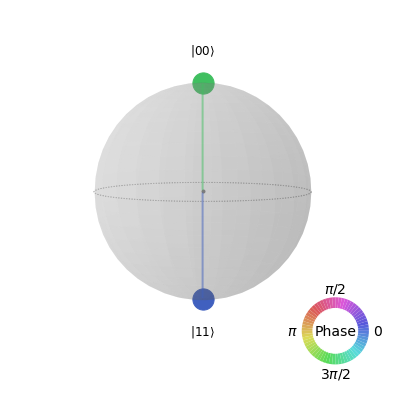

In [10]:
plot_state_qsphere(sv4)

# Assignment
#### Read the instructions carefully. You are NOT ALLOWED to make any change outside the instructed place.
#### Naming format for the submitted file should be Lab2_\<Your_Name\>.ipynb. If you use any other format that submission will not be considered!!!

# Lab - 2 Assignment - 4 [3 Points]

Create circuit for $\vert\Phi^-\rangle, \vert\Psi^+\rangle, \vert\Psi^-\rangle$. [***NOTE:*** write your code in given area ONLY, do not touch other parts. Also, DON'T use any gates which will remove the effect of H and X gates added]

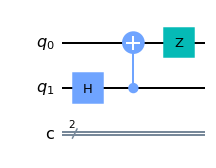

In [106]:
qc1 = QuantumCircuit(2, 2)

qc1.h(1)

# Write your code below for |Φ−⟩

qc1.cx(1,0)
qc1.z(0)




qc1.draw('mpl')

In [36]:
from qiskit import Aer
from qiskit.visualization import array_to_latex

backend0 = Aer.get_backend('qasm_simulator')

qc1.save_statevector()

result1 = backend0.run(qc1).result()
sv3 = result1.get_statevector()

array_to_latex(sv3)

<IPython.core.display.Latex object>

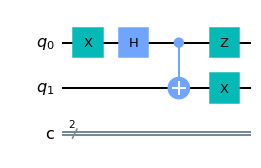

In [94]:
qc2 = QuantumCircuit(2, 2)

qc2.x(0)

# Write your code below for |Ψ+⟩
#qc2.x(1)
qc2.h(0)
qc2.cx(0,1)
qc2.x(1)
qc2.z(0)

qc2.draw('mpl')

In [40]:
from qiskit import Aer
from qiskit.visualization import array_to_latex

backend0 = Aer.get_backend('qasm_simulator')

qc2.save_statevector()

result2 = backend0.run(qc2).result()
sv3 = result2.get_statevector()

array_to_latex(sv3)

<IPython.core.display.Latex object>

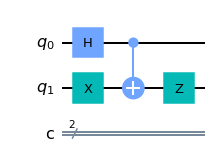

In [100]:
qc3 = QuantumCircuit(2, 2)

qc3.x(1)

# Write your code below for |Ψ-⟩

qc3.h(0)
qc3.cx(0,1)
qc3.z(1)
qc3.draw('mpl')

In [49]:
from qiskit import Aer
from qiskit.visualization import array_to_latex

backend0 = Aer.get_backend('qasm_simulator')

qc3.save_statevector()

result3 = backend0.run(qc3).result()
sv3 = result3.get_statevector()

array_to_latex(sv3)

<IPython.core.display.Latex object>

# Lab - 2 Assignment - 5 [3 Points]

Run above three circuits in simulator, plot qsphere and histogram for each one.

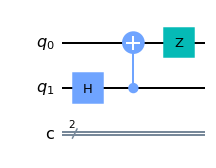

In [28]:
qc1 = QuantumCircuit(2, 2)

qc1.h(1)

# Write your code below for |Φ−⟩

qc1.cx(1,0)
qc1.z(0)

qc1.draw('mpl')

In [29]:
from qiskit import Aer
from qiskit.visualization import array_to_latex

backend0 = Aer.get_backend('qasm_simulator')

qc1.save_statevector()

result = backend0.run(qc1).result()
sv3 = result.get_statevector()

array_to_latex(sv3)

<IPython.core.display.Latex object>

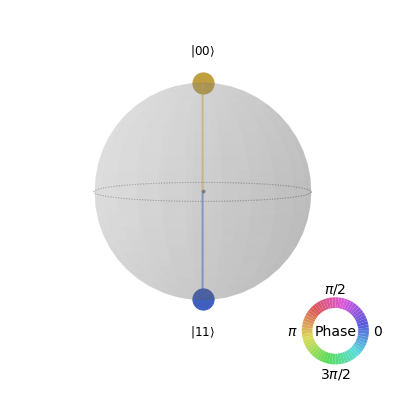

In [30]:
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(sv3)

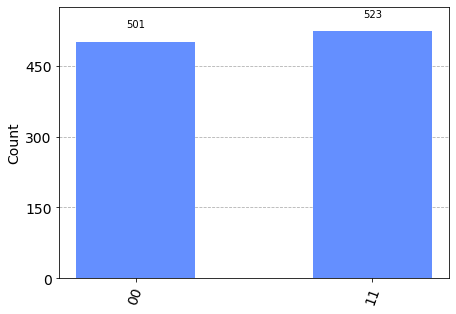

In [31]:
#|Φ−⟩
count1 = result1.get_counts()
plot_histogram(count1)

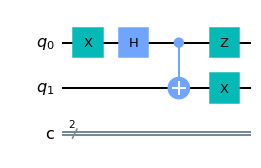

In [9]:
qc2 = QuantumCircuit(2, 2)

qc2.x(0)

# Write your code below for |Ψ+⟩
#qc2.x(1)
qc2.h(0)
qc2.cx(0,1)
qc2.x(1)
qc2.z(0)

qc2.draw('mpl')

In [87]:
#|Ψ+⟩
from qiskit import Aer
from qiskit.visualization import array_to_latex

backend0 = Aer.get_backend('qasm_simulator')

qc2.save_statevector()

result = backend0.run(qc2).result()
sv3 = result.get_statevector()

array_to_latex(sv3)


<IPython.core.display.Latex object>

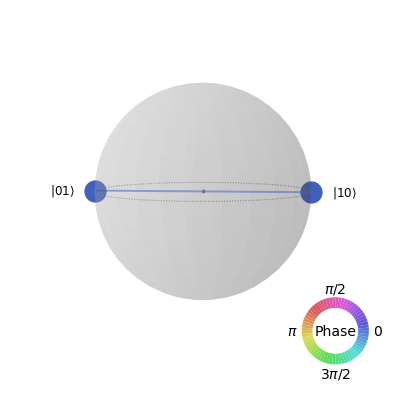

In [88]:
from qiskit.visualization import plot_state_qsphere


plot_state_qsphere(sv3)

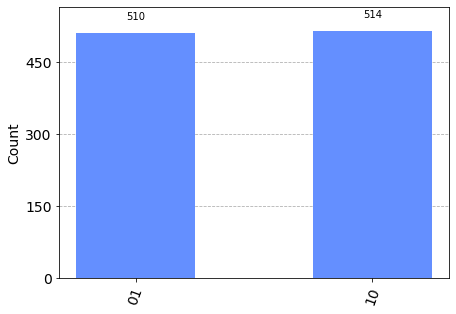

In [86]:
count = result.get_counts()
plot_histogram(count)

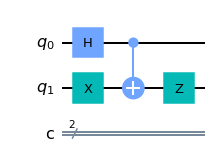

In [3]:
qc3 = QuantumCircuit(2, 2)

qc3.x(1)

# Write your code below for |Ψ-⟩

qc3.h(0)
qc3.cx(0,1)
qc3.z(1)
#qc3.measure([0,1],[0,1])
qc3.draw('mpl')

In [4]:
#|Ψ-⟩
from qiskit import Aer
from qiskit.visualization import array_to_latex

backend0 = Aer.get_backend('qasm_simulator')

qc3.save_statevector()

result3 = backend0.run(qc3).result()
sv3 = result3.get_statevector()

array_to_latex(sv3)


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<IPython.core.display.Latex object>

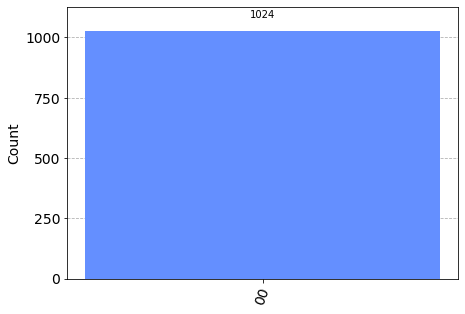

In [5]:

count = result3.get_counts()
plot_histogram(count)

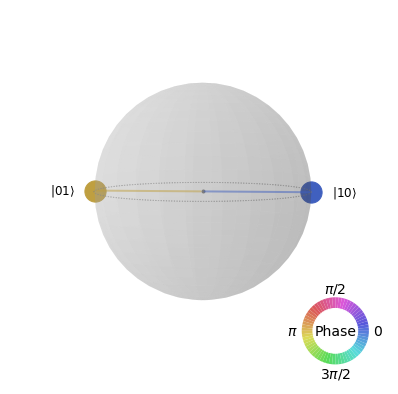

In [6]:
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(sv3)

# Lab - 2 Assignment - 6 [1 point]

Run `qc3` from Assignment 4 in real backend and plot histogram.

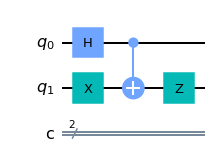

In [3]:
qc3 = QuantumCircuit(2, 2)

qc3.x(1)

# Write your code below for |Ψ-⟩

qc3.h(0)
qc3.cx(0,1)
qc3.z(1)
#qc3.measure([0,1],[0,1])
qc3.draw('mpl')

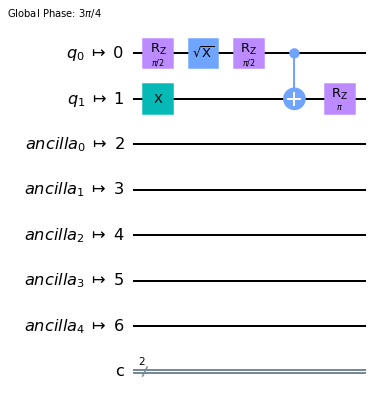

In [4]:
#backend = provider.get_backend('ibm_oslo')
trans2 = transpile(qc3, backend)
trans2.draw('mpl')

In [5]:

job = backend.run(trans2, shots = 1024)
#job_id
job_monitor(job)

Job Status: job has successfully run


In [6]:
# Collect job results
#job = backend.retrieve_job(job_id)
result = job.result()
count = result.get_counts()
print(count)

{'00': 1024}


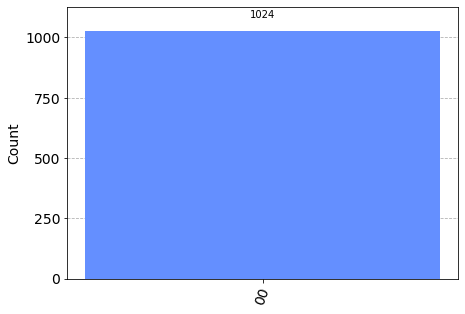

In [8]:
plot_histogram(count)

# Gate Identities

Lets start with Controlled-Z gate

In [ ]:
mycz = QuantumCircuit(2)

mycz.h(0)
mycz.x(1)
mycz.cz(0, 1)
mycz.draw('mpl')

In [ ]:
mycz.save_statevector()

result = backend0.run(mycz).result()
state = result.get_statevector()

array_to_latex(state)

$\frac{\vert10\rangle-\vert11\rangle}{\sqrt2}$

$\vert1\rangle\frac{\vert0\rangle-\vert1\rangle}{\sqrt2}$

In [ ]:
plot_state_qsphere(state)

In [ ]:
mycz1 = QuantumCircuit(2)

mycz1.h(0)
mycz1.x(1)

mycz1.h(1)
mycz1.cx(0, 1)
mycz1.h(1)

mycz1.draw('mpl')

In [ ]:
mycz1.save_statevector()

result = backend0.run(mycz1).result()
state1 = result.get_statevector()

plot_state_qsphere(state1)

In [ ]:
array_to_latex(state1)

### Swap gate

In [ ]:
swapcircuit = QuantumCircuit(2)

swapcircuit.swap(0, 1)
swapcircuit.draw('mpl')

In [ ]:
swapcircuit.decompose().draw('mpl')

### Toffoli gate

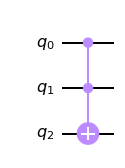

In [13]:
tof = QuantumCircuit(3)

tof.ccx(0, 1, 2)
tof.draw()

In [ ]:
tof.decompose().draw()

### $T$ and $T^\dagger$ gate

$T$ gate is the phase gate $\sqrt S$. Corresponding unitary is $$U = \begin{pmatrix}1&0\\0&e^{i\pi/4}\end{pmatrix}.$$ $T^\dagger$ is inverse of $T$.

# Assignment
#### Read the instructions carefully. You are NOT ALLOWED to make any change outside the instructed place.
#### Naming format for the submitted file should be Lab2_\<Your_Name\>.ipynb. If you use any other format that submission will not be considered!!!

# Lab - 2 Assignment - 7 [1 Point]

Create a circuit to represent decomposed version of `Toffoli gate`. [***NOTE:*** use all the gates explicitely]

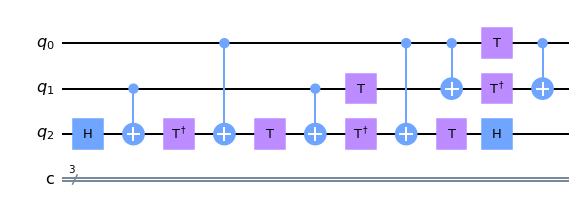

In [7]:
qctof = QuantumCircuit(3,3)
qctof.h(2)
qctof.cx(1,2)
qctof.tdg(2)
qctof.cx(0,2)
qctof.t(2)
qctof.cx(1,2)
qctof.t(1)
qctof.tdg(2)
qctof.cx(0,2)
qctof.cx(0,1)
qctof.t(2)
qctof.t(0)
qctof.tdg(1)
qctof.h(2)
qctof.cx(0,1)
qctof.draw('mpl')

# Lab - 2 Assignment - 8 [2 Points]

Find out statevectors and qsphere visualizations to see both (`tof` circuit above and your prepared circuit) are same.

In [10]:
from qiskit import Aer
from qiskit.visualization import array_to_latex

backend0 = Aer.get_backend('qasm_simulator')

qctof.save_statevector()

result = backend0.run(qctof).result()
sv3 = result.get_statevector()

array_to_latex(sv3)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<IPython.core.display.Latex object>

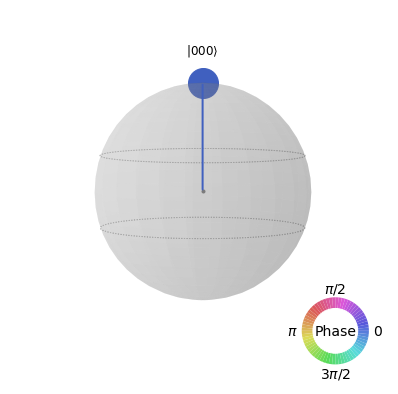

In [12]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(sv3)

In [14]:
from qiskit import Aer
from qiskit.visualization import array_to_latex

backend0 = Aer.get_backend('qasm_simulator')

tof.save_statevector()

result = backend0.run(tof).result()
sv3 = result.get_statevector()

array_to_latex(sv3)

<IPython.core.display.Latex object>

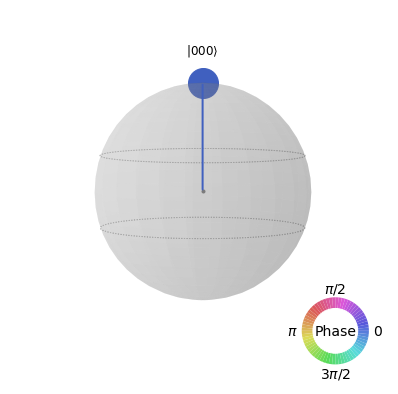

In [15]:
plot_state_qsphere(sv3)

# Lab - 2 Assignment - 9 [1 Point]

Create a circuit for state $\vert01\rangle$. Use `plot_bloch_multivector` for the corresponding statevector. Now apply `swap gate` and plot the same.

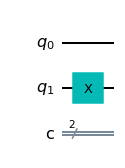

In [16]:
qc01=QuantumCircuit(2,2)
qc01.x(1)
qc01.draw('mpl')

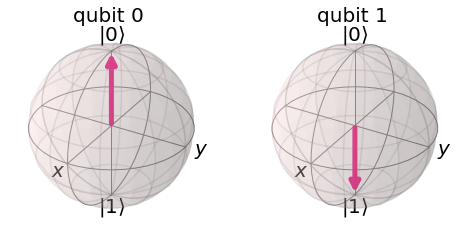

In [17]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
state = Statevector(qc01)
plot_bloch_multivector(state)

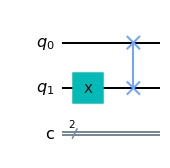

In [18]:
qc01.swap(0, 1)
qc01.draw('mpl')

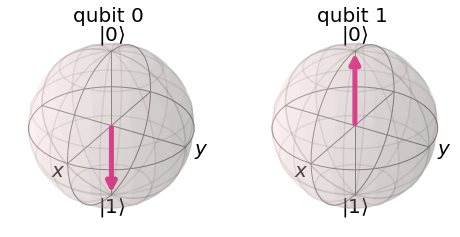

In [19]:
state = Statevector(qc01)
plot_bloch_multivector(state)

# Additional reading

- For `single-qubit gates`: https://qiskit.org/textbook/ch-states/single-qubit-gates.html
- For `multi-qubit States`: https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html
- For `gate identities`: https://qiskit.org/textbook/ch-gates/more-circuit-identities.html
- `QuantumCircuit documentation`: https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html
- The `1 minute Qiskit` episode entitled `What is the qsphere?` succinctly describes the Qsphere visualization tool that we used in this lab. You can find it here: https://youtu.be/4SoK2h4a7us